# 1. it-en 및 zh-en 에서 P@1,2,…,10 각 방법론별 계산

In [3]:
from _test import *

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def get_scores(lang1, lang2, model, query2target):
    scores = []
    for n_best in range(1, 11):
#         print(f"P@{n_best}")
        word2x, y2word, x2ys = load_data(lang1, lang2, model)
        n_correct, n_wrong = eval(query2target, word2x, y2word, x2ys, n_best)
#         assert n_correct + n_wrong == 1500

        precision = round(100*n_correct / 1500, 1)
        scores.append(str(precision))
#         scores = " & ".join(scores)
#         print(f"{model} & {scores}")
    return np.array(scores, np.float32)

In [24]:
## en-it
lang1, lang2 = "en", "it"
query2target = get_muse(lang1, lang2)
co = get_scores(lang1, lang2, "co", query2target)
pmi = get_scores(lang1, lang2, "pmi", query2target)
w2w = get_scores(lang1, lang2, "w2w", query2target)

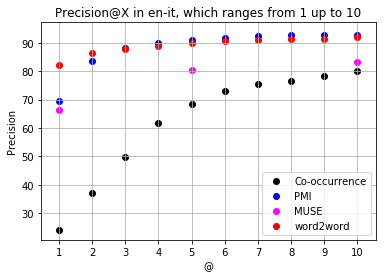

In [42]:
plt.title("Precision@X in en-it, which ranges from 1 up to 10")
plt.scatter(range(1, 11), co, c="black", label="Co-occurrence")
plt.scatter(range(1, 11), pmi, c="blue", label="PMI")
plt.scatter([1, 5, 10], [66.2, 80.4, 83.4], c="magenta", label="MUSE")
plt.scatter(range(1, 11), w2w, c="red", label="word2word")
plt.xticks(range(1, 11))
# plt.yticks(range(20, 100, 10))
plt.grid()
plt.xlabel("@")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [39]:
## it-en
lang1, lang2 = "it", "en"
query2target = get_muse(lang1, lang2)
co = get_scores(lang1, lang2, "co", query2target)
pmi = get_scores(lang1, lang2, "pmi", query2target)
w2w = get_scores(lang1, lang2, "w2w", query2target)

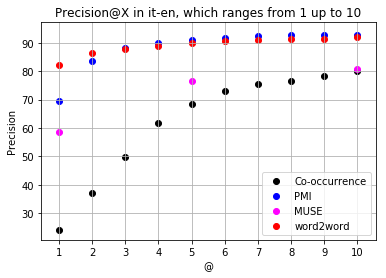

In [43]:
plt.title("Precision@X in it-en, which ranges from 1 up to 10")
plt.scatter(range(1, 11), co, c="black", label="Co-occurrence")
plt.scatter(range(1, 11), pmi, c="blue", label="PMI")
plt.scatter([1, 5, 10], [58.7, 76.5, 80.9], c="magenta", label="MUSE")
plt.scatter(range(1, 11), w2w, c="red", label="word2word")
plt.xticks(range(1, 11))
# plt.yticks(range(20, 100, 10))
plt.grid()
plt.xlabel("@")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [44]:
## en-zh_cn
lang1, lang2 = "en", "zh_cn"
query2target = get_google_results(lang1, lang2)
co = get_scores(lang1, lang2, "co", query2target)
pmi = get_scores(lang1, lang2, "pmi", query2target)
w2w = get_scores(lang1, lang2, "w2w", query2target)


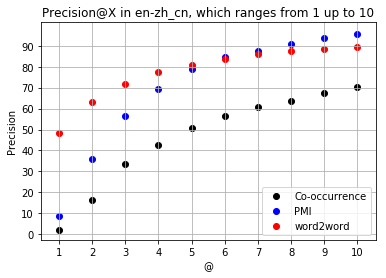

In [47]:
plt.title("Precision@X in en-zh_cn, which ranges from 1 up to 10")
plt.scatter(range(1, 11), co, c="black", label="Co-occurrence")
plt.scatter(range(1, 11), pmi, c="blue", label="PMI")
plt.scatter(range(1, 11), w2w, c="red", label="word2word")
plt.xticks(range(1, 11))
plt.yticks(range(0, 100, 10))
plt.grid()
plt.xlabel("@")
plt.ylabel("Precision")
plt.legend(loc=4)
plt.show()

In [49]:
## zh_cn-en
lang1, lang2 = "zh_cn", "en" 
query2target = get_google_results(lang1, lang2)
co = get_scores(lang1, lang2, "co", query2target)
pmi = get_scores(lang1, lang2, "pmi", query2target)
w2w = get_scores(lang1, lang2, "w2w", query2target)

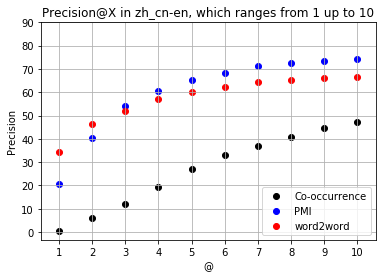

In [50]:
plt.title("Precision@X in zh_cn-en, which ranges from 1 up to 10")
plt.scatter(range(1, 11), co, c="black", label="Co-occurrence")
plt.scatter(range(1, 11), pmi, c="blue", label="PMI")
plt.scatter(range(1, 11), w2w, c="red", label="word2word")
plt.xticks(range(1, 11))
plt.yticks(range(0, 100, 10))
plt.grid()
plt.xlabel("@")
plt.ylabel("Precision")
plt.legend(loc=4)
plt.show()

# 2. 한가지 언어 잡고 사용한 parallel example 개수에 비례하여 성능 플랏

In [1]:
# p@1 for it

In [29]:
def get_scores(lang1, lang2, model, query2target, num, at):
    def load_data(lang1, lang2, model, num):
        if num==35000000: num=""
        fp = f"{model}{num}/{lang1}-{lang2}.pkl"

        word2x, y2word, x2ys = pickle.load(open(fp, 'rb'))
        return word2x, y2word, x2ys
    
    word2x, y2word, x2ys = load_data(lang1, lang2, model, num)
    n_correct, n_wrong = eval(query2target, word2x, y2word, x2ys, at)

    precision = round(100*n_correct / 1500, 1)
    return precision

In [42]:
lang1, lang2 = "en", "it"
at = 1
query2target = get_muse(lang1, lang2)

In [31]:
# co
co = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'co', query2target, num, at)
    co.append(precision)

In [32]:
# pmi
pmi = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'pmi', query2target, num, at)
    pmi.append(precision)

In [33]:
# w2w
w2w = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'w2w', query2target, num, at)
    w2w.append(precision)

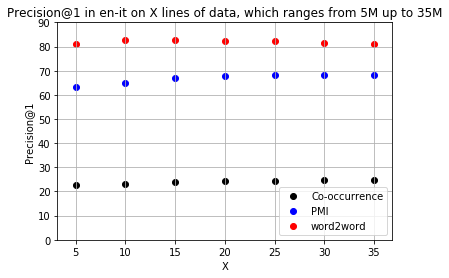

In [34]:
plt.title("Precision@1 in en-it on X lines of data, which ranges from 5M up to 35M")
plt.scatter(range(5, 35+1, 5), co, c="black", label="Co-occurrence")
plt.scatter(range(5, 35+1, 5), pmi, c="blue", label="PMI")
plt.scatter(range(5, 35+1, 5), w2w, c="red", label="word2word")
plt.xticks(range(5, 35+1, 5))
plt.yticks(range(0, 100, 10))
plt.grid()
plt.xlabel("X")
plt.ylabel("Precision@1")
plt.legend(loc=4)
plt.show()

In [43]:
at=5

In [44]:
# co
co = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'co', query2target, num, at)
    co.append(precision)

In [45]:
# pmi
pmi = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'pmi', query2target, num, at)
    pmi.append(precision)

In [46]:
# w2w
w2w = []
for num in range(5000000, 35000000+1, 5000000):
    precision = get_scores(lang1, lang2, 'w2w', query2target, num, at)
    w2w.append(precision)

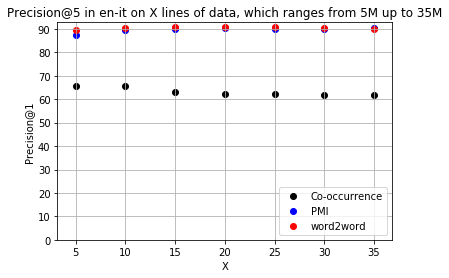

In [47]:
plt.title("Precision@5 in en-it on X lines of data, which ranges from 5M up to 35M")
plt.scatter(range(5, 35+1, 5), co, c="black", label="Co-occurrence")
plt.scatter(range(5, 35+1, 5), pmi, c="blue", label="PMI")
plt.scatter(range(5, 35+1, 5), w2w, c="red", label="word2word")
plt.xticks(range(5, 35+1, 5))
plt.yticks(range(0, 100, 10))
plt.grid()
plt.xlabel("X")
plt.ylabel("Precision@1")
plt.legend(loc=4)
plt.show()

In [48]:
pmi

[87.3, 89.4, 89.9, 90.2, 90.1, 90.1, 90.3]

In [49]:
w2w

[89.5, 90.5, 90.9, 90.7, 90.7, 90.2, 89.8]